# Chap 01.Bandit Machine

---

conda env : [rl_learning](./README.md#setup-a-conda-environment)

### Chap 01.03.2 : Code Implementation

In [1]:
# @title Chap 01.03.2 : Code Implementation
# Average
import numpy as np

np.random.seed(0)
rewards = []
Q2 = 0

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    # Approach 1: navie implemetation
    Q1 = sum(rewards) / n
    # Approach 2: Increment implemetation
    Q2 = Q2 + (reward - Q2) / n
    print(Q1, Q1)

0.5488135039273248 0.5488135039273248
0.6320014351498722 0.6320014351498722
0.6222554154571295 0.6222554154571295
0.6029123573420713 0.6029123573420713
0.567060845741438 0.567060845741438
0.5801997236289743 0.5801997236289743
0.5598265075766483 0.5598265075766483
0.6013198192273272 0.6013198192273272
0.6415801460355164 0.6415801460355164
0.6157662833145425 0.6157662833145425


### Chap 01.04. Bandit Machine (Stationay Problem)

#### Action Value
- $Q_n = Q_{n-1} + \frac{1}{n}(R_n - Q_{n-1})$

- <font color = "blue">**Action value Function**</font>
  > The expected return(cumulative reward) starts from state s, following policy π, taking action a.
  > $$ Q_{\pi}(s, a) = E_{\pi}[\sum_{t=0}^{T-1}γ^{t}r_{t}|s_{t} = s, a_{t} = a]$$
  > Then we can rewrite in terms of goal, G:
  > $$ Q_{\pi}(s, a) = E_{\pi}[G_t|s_{t} = s, a_{t} = a]$$

total_reward : 865


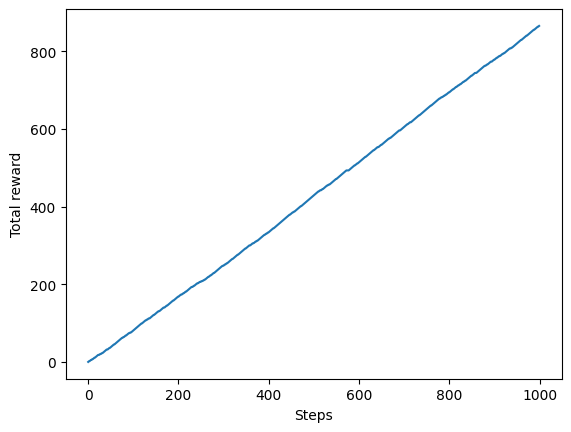

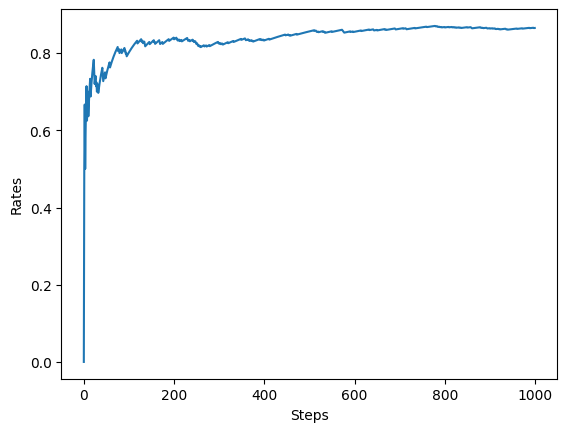

In [3]:
# @title Chap 01.04.1 : Code Implementation (Badit Machine)
# Bandit
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, arms = 10):
        self.rates = np.random.rand(arms) # ndarray

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

class Agent:
    def __init__(self, epsilon, action_sz = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_sz)
        self.ns = np.zeros(action_sz)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self): # eplison-greedy exploration
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # exploration
        else:
            return np.argmax(self.Qs) # exploitation

def test_1():
    bandit = Bandit()
    Q = 0
    for n in range(1, 11):
        reward = bandit.play(0)
        Q += (reward - Q) / n
        print(Q)

    Qs = np.zeros(10)
    ns = np.zeros(10)

    for n in range(1, 11):
        action = np.random.randint(0, 10)
        reward = bandit.play(action)
        ns[action] += 1
        Qs[action] += (reward - Qs[action]) / ns[action]
        print(action, reward, Qs)


def test_2():
    steps = 1000
    eplison = 0.1

    bandit = Bandit()
    agent = Agent(eplison)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()  #select action
        reward = bandit.play(action) # play get reward
        agent.update(action, reward) # update
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    print(f"total_reward : {total_reward}")

    plt.ylabel('Total reward')
    plt.xlabel('Steps')
    plt.plot(total_rewards)
    plt.show()

    plt.ylabel('Rates')
    plt.xlabel('Steps')
    plt.plot(rates)
    plt.show()


if __name__ == "__main__":
    # test_1()
    test_2()


### Chap 01.04.2 : Code Implementation (Badit_AVG Machine)

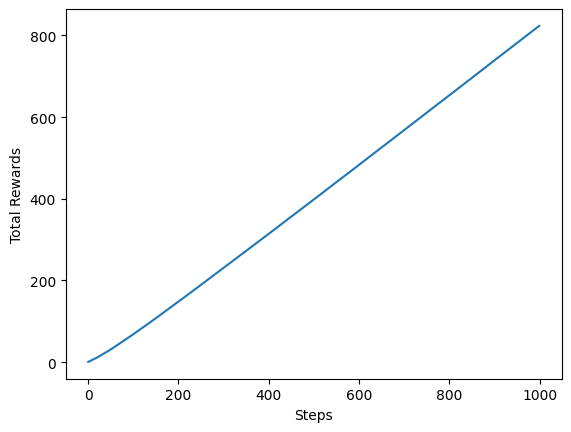

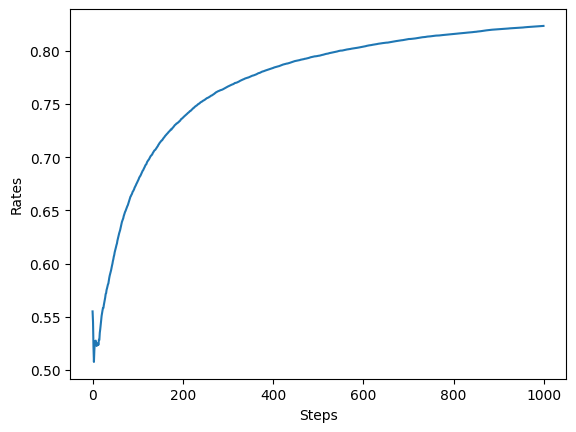

In [4]:
# @title Chap 01.04.2 : Code Implementation (Badit_AVG Machine)
# Bandit_AVG

runs = 200
steps = 1000
eplison = 0.1

all_total_rewards = np.zeros((runs, steps))
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(eplison)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()  #select action
        reward = bandit.play(action) # play get reward
        agent.update(action, reward) # update
        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    all_total_rewards[run] = total_rewards
    all_rates[run] = rates

avg_total_rewards = all_total_rewards.mean(axis=0)
avg_rates = all_rates.mean(axis=0)


plt.ylabel('Total Rewards')
plt.xlabel('Steps')
plt.plot(avg_total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

### Chap 01.05. Bandit Machine (Non Stationary Problem)

#### Action Value (Stationary problem)
- $Q_n = Q_{n-1} + \frac{1}{n}(R_n - Q_{n-1})$


#### Action Value (Non-Stationary problem)
- <font color="red">$Q_n = Q_{n-1} + α(R_n - Q_{n-1}) (0 < α < 1)$ </font>
> $Q_n = Q_{n-1} + α(R_n - Q_{n-1})$
> $    = αR_n + Q_{n-1} - αQ_{n-1}$
> $    = αR_n + (1 - α)Q_{n-1}$
- Exponential moving average
    - $Q_n = αR_n + α(1 - α)R_{n-1} + α(1 - α)^2R_{n-2} + ... + α(1 - α)^{n-1}R_{1}+ α(1 - α)^nQ_{0}$




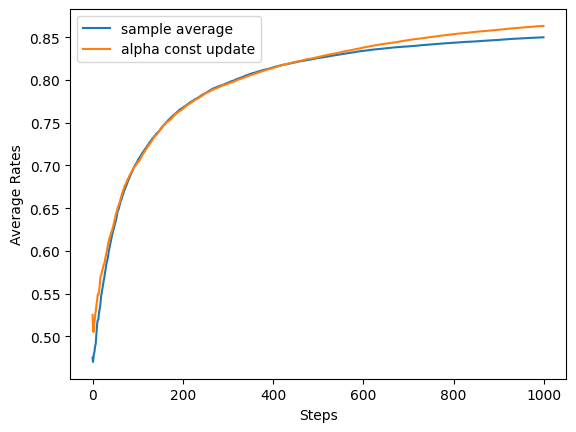

In [5]:
# @title Chap 01.05.2 : Code Implementation (Bandit Machine : Non Stationary Problem)
class NonStatBandit:
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms) # ndarray

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.01 * np.random.randn(self.arms)
        # print(self.rates)
        if rate > np.random.rand():
            return 1
        else:
            return 0

class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

def test_3():
    runs = 200
    steps = 1000
    epsilon = 0.1
    alpha = 0.8
    agent_types = ['sample average', 'alpha const update']
    results = {}

    for agent_type in agent_types:
        all_rates = np.zeros((runs, steps))  # (200, 1000)

        for run in range(runs):
            if agent_type == 'sample average':
                agent = Agent(epsilon)
            else:
                agent = AlphaAgent(epsilon, alpha)

            bandit = NonStatBandit()
            total_reward = 0
            rates = []

            for step in range(steps):
                action = agent.get_action()
                reward = bandit.play(action)
                agent.update(action, reward)
                total_reward += reward
                rates.append(total_reward / (step + 1))

            all_rates[run] = rates

        avg_rates = np.average(all_rates, axis=0)
        results[agent_type] = avg_rates

    # plot
    plt.figure()
    plt.ylabel('Average Rates')
    plt.xlabel('Steps')
    for key, avg_rates in results.items():
        plt.plot(avg_rates, label=key)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    test_3()
